# Day 6 Decision Trees
- Decision Trees are considered one of the most mature, traditional, algorithms in predictive analytics
- They are typically used to solve classification problems through visual and explicit representations of decisions and decision making.
- Think of them like a map where you follow each path according to your decision, and each path leads to a new choice to make until you reach the end.
- They mimic the way you probably make decisions in your daily life:
<img src="../static/screenshots/day6-1.png">

## Terminology
- **Root**: Our starting point for the tree. Note that a decision tree is drawn upside down since its root is at the top
    - Alone Or With Friends is the root in the above example
- **Branch**: Also known as an edge, these lead from condition to condition, down to the results
    - Sunny or Rainy are branches in the above example
- **Condition**: Also known as an internal node, this is the choice that needs to be made in order to figure out which branch to take.
    - Weather Outside? is our condiition in the above example
- **Leaf**: Also known as a decision, these are the final results that signify the classification of the data. There are no branches coming out of a leaf, only going in to it.
    - video games, soccer and movies are all examples of a leaf

## Question to the class: Why and when do we need Decision Trees?
Shout out or type your answers!

### Our answers:
- When features are Categorical
    - When we can classify data into known groups
- When we want to model a set of sequential, hierarchical decisions that lead to some final result. This result is the known group that the data point would be categorized into
- When we need to explain the reason for a particular decision
- Example use cases:
    - Sales and marketing departments might need a complete description of rules that influence the acquisition of a customer before they start their campaign activities
    - Product planning (do we build this product or not?)
    - Determining someone is a good or bad level of risk
    
## The root and the leafs for Decision Tree are obtained based on:
- Conditional Probability
- Entropy
- Information Gain

## Lens Dataset
Let's review the Attribute Information that we know:

We have 3 Classes (leaves/results)

1. the patient should be fitted with hard contact lenses,
2. the patient should be fitted with soft contact lenses,
3. the patient should not be fitted with contact lenses.

The dataset has 4 Features (conditions):
1. age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic
2. spectacle prescription: (1) myope, (2) hypermetrope
3. astigmatic: (1) no, (2) yes
4. tear production rate: (1) reduced, (2) normal

Here is the data used for the Decision Tree:
<img src="../static/screenshots/day6-2.png">

## Lens Decision Tree Visualized
This is ultimately what we want to build using the above dataset
<img src="../static/screenshots/day6-3.png">

## Decision Trees are based on Entropy
### Activity: Calculate the entropy for a coin
**Entropy** shows the uncertainy of a random variable. The higher the entropy value, the more unncertain we are. Entropy is displayed as $H(X)$, where $X$ is a random variable

The Entropy formula is the summation of probabilities multiplied by the log of probabilities:

### Entropy of coin
Given p stands for "probability of",

for outcome in [H,T]:

$H(Coin) = \sum -p(outcome) * log_2(p(outcome)$

### Entropy of a fair coin
for p(outcome) in [p(H)=0.5, p(T)=0.5]):

$H(Coin) = \sum -p(outcome) * log_2(p(outcome)$

### Do the following in pairs:
- Create a function entropy that takes an array of probabilities as input, and returns the entropy using the formula above
    - numpy's array, log2, and sum functions should be useful here
- show that the fair coin has the largest entropy (uncertainty) by trying different values for the probability of heads and tails
    - i.e. show that a fair coin [.5, .5] has a larger entropy than a coin with [.9, .1] probabilities

In [17]:
import numpy as np

def entropy(p): #represents the probability of an uncertainty list
    H = np.array([-i*np.log2(i) for i in p]).sum()
    return H
    
p = [.5, .5]
# entropy represents uncertainty, a fair coin is the most uncertain case
print(entropy(p))

p = [.9, .1]
print(entropy(p))

1.0
0.4689955935892812


### Change p (probability of head and tail) and plot the entropy for different values of p
<img src="../static/screenshots/day6-4.png" width=400>
The fair coin has the highest entropy which means a fair coin has the highest uncertain result when toss a coin

### Entropy of fair dice

In [18]:
p = [1/6]*6
print(p)
print(entropy(p))

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2.584962500721156


## How We'll Use Decision Trees Today
- You’ll see if a decision tree can give you any insight as to how the eye doctor prescribes contact lenses
- You can predict the type of lenses people will use and understand the underlying processes with a decision tree
- Predict if a tennis player will play outside based on weather conditions

## Quick Review on Conditional Probability
We'll be using conditional probability to solve the following activities. Before we do so, let's take 10 minutes to [review conditional probability from DS 1.1](https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Applied_Probability.ipynb)

We'll even see the same data set we're about to build a decision tree for!

## Let's build a Decision Tree for the Tennis Data
The following table shows us the decision making factors used to play tennis outside based on 14 days of data for different weather conditions
<img src="../static/screenshots/day6-5.png" width=400>


## Activity: Obtain the following quantitites:
In groups of 3: Using the tennis dataset, obtain the following quantities:

### Entropy for PlayTennis:
Obtain the entropy of thePlayTennis (Leaf/Decision) column.

### Entropy for PlayTennis conditioned on Weak Wind factor
Obtain the entropy of conditional probability p(PlayTennis | Wind = Weak) = [2/8, 6/8]

### Entropy for PlayTennis conditioned on Strong Wind factor
Obtain the entropy of conditional probability p(PlayTennis | Wind = Strong) = [3/6, 3/6]

#### Hints:
- p = [9/14, 5/14] which represents the probability that a player plays tennis (9/14 days) or not (5/14 days)
- Remember your Entropy function from earlier

### Solutions
Entropy(Decision) = – (9/14) . log2(9/14) – (5/14) . log2(5/14) = 0.940

<img src="../static/screenshots/day6-6.png">

In [19]:
import pandas as pd

data = pd.read_csv('./dataset/tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Play'])
print(data)

     Outlook  Temp Humidity    Wind Play
1      Sunny   Hot     High    Weak   No
2      Sunny   Hot     High  Strong   No
3   Overcast   Hot     High    Weak  Yes
4       Rain  Mild     High    Weak  Yes
5       Rain  Cool   Normal    Weak  Yes
6       Rain  Cool   Normal  Strong   No
7   Overcast  Cool   Normal  Strong  Yes
8      Sunny  Mild     High    Weak   No
9      Sunny  Cool   Normal    Weak  Yes
10      Rain  Mild   Normal    Weak  Yes
11     Sunny  Mild   Normal  Strong  Yes
12  Overcast  Mild     High  Strong  Yes
13  Overcast   Hot   Normal    Weak  Yes
14      Rain  Mild     High  Strong   No


In [20]:
data['Play'].value_counts().to_dict()

{'Yes': 9, 'No': 5}

In [21]:
len(data)

14

In [22]:
import numpy as np

def entropy(p): #represents the probability of an uncertainty list
    H = np.array([-i*np.log2(i) for i in p]).sum()
    return H

p = [9/14, 5/14]
print(entropy(p))

0.9402859586706311


### What is the entropy of play given the wind is weak?

In [23]:
print(data[data['Wind'] == 'Weak']['Play'].value_counts().to_dict())

p = [6/8, 2/8]
print(entropy(p))

{'Yes': 6, 'No': 2}
0.8112781244591328


### What is the entropy of play given the wind is strong?

In [24]:
print(data[data['Wind'] == 'Strong']['Play'].value_counts().to_dict())

p = [3/6, 3/6]
print(entropy(p))

{'No': 3, 'Yes': 3}
1.0


## Information Gain
Information Gain **measures how much information a feature gives us about the decision (class)**. This is the main measurement used by a Decision Tree algorithm to construct a Decision Tree!

- Decision Trees will always try to maximize information gain
- The higher the information gain a feature has, the more likely it is to be tested first
    - the feature with the highest information gain will be the first feature in the decision tree, and its branches will lead to the other features

## Obtain the Information Gain Between PlayTennis (Decision) and Wind
- What is the probability that wind be weak?
Hint: Count how many instannces of weak and strong winds we have divided by how many sample we have.

p(Wind = Weak) = 8/ 14

p(Wind = Strong) = 6/ 14

Below are the formulas for finding Information Gain $I(X; Y)$ for a given decision $X$ and feature $Y$, and the Entropy for a decision given a feature

<img src="../static/screenshots/day6-7.png" width=500>


Given p stands for "probability of",

for Wind = {Weak, Strong}:

- $I(Decision; Wind) = H(Decision) - \sum p(Wind) * Entropy(Decision | Wind)$

We can break this down further:

$H(Decision) - \sum p(Wind) * Entropy(Decision | Wind)$

$=$

$H(Decision) - (p(Wind = Weak) * H(Decision | Wind = Weak) + p(Wind = Strong) * H(Decision | Wind = Strong)) = 0.048$


In [37]:
# information gain between play column and wind column
0.9402859586706311 - (8/14 * 0.8112781244591328 + 6/14 * 1.0)

0.04812703040826949

## Other factors on Decision column
We have applied similar calculation on the other features (columns)

1. Information Gain(Decision, Wind) = 0.048
2. Information Gain(Decision, Outlook) = 0.246
3. Information Gain(Decision, Temperature) = 0.029
4. Information Gain(Decision, Humidity) = 0.151

### We can see Outlook and Decision have the highest Gain, so Outlook will be the root for the Decision Tree!
### If we keep continuing the calculation of Information Gain between nodes (features), we can build the tree based on the highest Information Gains from feature to feature
Example: Information Gain (Outlook, Wind), Information Gain (Outlook, Temperature), Information Gain (Outlook, Humidity), and then finding the information gain after that, and so on and so forth

## Build the decision tree with sklearn for tennis dataset
<img src="../static/screenshots/day6-8.png" width=600>

### For Decision Tree Visualization in Python:
Packages that are needed are below. Note that the multiple installs for graphviz are to ensure the executables install correctly to avoid this error:

conda install -c anaconda graphviz

brew install graphviz

conda install -c anaconda pydot

conda install -c conda-forge pydotplus

In [38]:
import numpy as np

# Helper method for entropy
def entropy(p): #represents the probability of an uncertainty list
    H = np.array([-i*np.log2(i) for i in p]).sum()
    return H

In [39]:
# hint: helper function that takes a dataset (df) and one of its features (c1),
# decision (c2), and condition of the feature (condition) as input, and outputs
# the condiitional probability
def conditional_prob(df, c1, c2, condition):
    df_new = df[df[c1] == condition][c2]
    s = df_new.unique()
    population_size = len(df_new)
    pr = {}
    for i in s:
        pr[i] = len(df[(df[c1] == condition) & (df[c2]== i)]) / population_size
    
    return pr

# what are the probabilities of Play  given Wind is Weak?
print(conditional_prob(data,'Wind', 'Play', 'Weak'))

# what are the probabilities of Play given Wind is Strong?
print(conditional_prob(data, 'Wind', 'Play', 'Strong'))

{'No': 0.25, 'Yes': 0.75}
{'No': 0.5, 'Yes': 0.5}


## Info Gain Solution

In [40]:
# inputs: dataset (df), a feature from the dataset (feature), and the target (decision)
# returns: information gain between feature and decision
def info_gain(df, feature, target): #target in tennis dataset would be 'Play' and feature would be Wind, Humidity, Temp, Outlook
    #1. obtain entropy of target
    target_dict = data[data['Wind'] == 'Strong']['Play'].value_counts().to_dict()
    
    
    #2. obtain different chances (probabilities) of the feature
    # example: for Wind, obtain the probabilities of Strong and Weak
    
    #3. obtain conditional entropy
    # obtain the probability of the decision,
    # for all possible values of the feature (conditions)
    
    #4. calculate information gain between feature and target using steps 1, 2, 3. Return step 4
    # Given the above metrics, calculate the information gain
    # between the feature and the decision using the formula we learned

def get_entrophy()


SyntaxError: invalid syntax (<ipython-input-40-8b08fa689d13>, line 19)

### Milad's Info Gain Solution

In [44]:
# inputs: dataset (df), a feature from the dataset (feature), and the target (decision)
# returns: information gain between feature and decision
def info_gain(df, feature, decision):
    # obtain the entropy of the decision
    dict_decision = dict(df[decision].value_counts())
    prob_decision = [q for (p,q) in dict_decision.items()]/sum(dict_decision.values())
    entropy_decision = entropy(prob_decision)
#     print("Entropy Decision=", entropy_decision)
    
    # obtain the probabilities of the feature
    # example: for Wind, obtain the probabilities of Strong and Weak
    dict_feature = dict(df[feature].value_counts())
    dict_prob_feature = {}
    for (p,q) in dict_feature.items():
        dict_prob_feature[p] = q/sum(dict_feature.values())
#     print(dict_prob_feature)
    
    # obtain the probability of the decision,
    # for all possible values of the feature (conditions)
    conditions = df[feature].unique()
    dict_ = {}
    for condition in conditions:
        dict_[condition] = conditional_prob(df, feature, decision, condition)
#     print(dict_)
    
    # Given the above metrics, calculate the information gain
    # between the feature and the decision using the formula we learned
    S = 0
    for (i,j) in dict_.items():
#         print(i,j)
        prob_condition = list(dict_[i].values())
#         print(entropy_condition)
        S = S + dict_prob_feature[i]*entropy(prob_condition)
#         print(dict_prob_feature[i]*entropy(entropy_condition))
    print(entropy_decision - S)
    
info_gain(data, 'Wind', 'Play')
info_gain(data, 'Humidity', 'Play')
info_gain(data, 'Temp', 'Play')
info_gain(data, 'Outlook', 'Play')

0.04812703040826949
0.15183550136234159
0.02922256565895487
0.24674981977443933


## Optional: We can show the information gain between any feature with itself is equal to its entropy:

$I(X, X) = H(X)$

In [46]:
for i in ['Outlook', 'Temp', 'Humidity', 'Wind', 'Play']:
    # probability of each feature
    p = [m/sum(data[i].value_counts().to_dict().values()) for m in list(data[i].value_counts().to_dict().values())]
    print(entropy(p))
    info_gain(data, i, i)

[0.35714285714285715, 0.35714285714285715, 0.2857142857142857]
1.5774062828523454
1.5774062828523454
[0.42857142857142855, 0.2857142857142857, 0.2857142857142857]
1.5566567074628228
1.5566567074628228
[0.5, 0.5]
1.0
1.0
[0.5714285714285714, 0.42857142857142855]
0.9852281360342515
0.9852281360342515
[0.6428571428571429, 0.35714285714285715]
0.9402859586706311
0.9402859586706311


# Day 7: Principal Component Analysis

## Principel Component Analysis (PCA)
- PCA is a well-known algorithm for **Dimensionality Reduction**
- PCA:
    - Reduces the number of features while keeping the features information
    - Removes correlations among features
    - Emphasizes variation of strong features, making the data easier to visualize

## Check in for Pre-Watching of PCA:
Going forward, it is assumed that you have already watched the following videos:
- What is PCA?: https://www.youtube.com/watch?v=HMOI_lkzW08
- What is a covariance matrix?: https://www.youtube.com/watch?v=0GzMcUy7ZI0
- How to multiply a matrix with a vector?: https://www.youtube.com/watch?v=Awcj447pYuk

Are there any questions about these videos?

## Review matrix multiplication
- Matrix `A = np.array([[2, 0], [1, 5]])` and vector `v = np.array([3, 4])` are given.
- Question: What is the multiplication of A by v?

Solve using the following methods:
- Compute it by hand
- Write a Python function to compute it (Hint: use the following function form numpy: `np.dot(A, v))`

In [1]:
import numpy as np

A = np.array([[2, 0], [1, 5]])
v = np.array([3, 4])

print(np.dot(A, v))

[ 6 23]


## EigenValue and Eigenvector of matrix
A martix's eigenvalues and eigenvectors are what we **will use for the scalar value a and vector v** respectively.
- **Eigenvector (v)** is a **vector whose direction remains unchanged** when a linear transformation is applied to it. They represent the rotation matrix
- **Eigenvalues (a)** represents the **scalar value that is used such that when multiplied by v, gives the same value as Av**

For given matrix A, we want to obtain a vector v and a scalar value a such that:

`Av = av`

### Write a Python function to obtain vector v and scalar a for a given matrix A
You will use the same matrix A that we used above.

**hints**:

1. Before we find the vector and scalar, we need the eigenvalue and eigenvector of A. Given the same matrix A we used above, see [how numpy's linalg.eig method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) could help you solve this
2. To check your answer, multiply A by one of its vectors, and then multiply a by the same vector, and see if you get the same outcome

In [5]:
#1.
eig_value, eig_vector = np.linalg.eig(A)

print("Eigen value=", eig_value)
print("Eigen vector=", eig_vector)
print("\nA = 5, 2 and v = 0, 1")

Eigen value= [5. 2.]
Eigen vector= [[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]

A = 5, 2 and v = 0, 1


## Check that Av = av

In [22]:
#2.
# A = np.array([[2, 0], [1, 5]])
# v = np.array([0, 1])
# print(A[1][1] * v)
# print(np.dot(A,v))

# multiply A with its first eigen-vector
np.dot(A, eig_vector[:, 0])

array([0., 5.])

In [21]:
# multiply the one eigen-value of A with its associated eigen-vector
eig_value[0] * eig_vector[:, 0] # 5 * [0., 1.]

array([0., 5.])

In [12]:
# Similarly, multiply A with its second eigen-vector
np.dot(A, eig_vector[:, 1])

array([ 1.8973666 , -0.63245553])

In [19]:
# multiply the other eigen-value of A with its associated eigen-vector
eig_value[1] * eig_vector[:, 1] # 2.0 * [0.9486833 , -0.31622777]

array([ 1.8973666 , -0.63245553])

## Activity: Are the countries in great UK different in terms of food?
- In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK
- We want to visually represent the diffrence among UK countries based on the food they eat, but this can be difficult when there's 17 types of food (dimensions) to consider. The graph would be incredibly hard to read!
- This is where PCA comes in to play: through PCA, we can consolidate the 17 types into what we call principle components.
- **Principle Components** allow us to **take an arbitrary number of data points (let's say 17) and consolidate them into a single (x, y)** datapoint for a given feature.

<img src="../static/screenshots/day7-1.png" width=800>

## Question:
Which country is different from the the others? Any idea or reasoning?
Do it together: Write a function that obtains the principle components from 17 types of food in UK
Get in groups of 3 for this activity

#### Setup:
- Download the dataset we will use for this activity: [pca_uk](https://render.githubusercontent.com/view/Datasets/pca_uk.xlsx)
- Run the following in your terminal:
    - `conda install -c anaconda xlrd`
    - `pip3 install xlrd`
    
We will use two principle components as an example to see them visually, but we can pick 3 or more principle components as well

#### Outline to follow:
- use pandas to read in the excel spreadsheet (research how pandas can read an excel file)
- build a matrix of the feature values, not including the text labels
- calculate the PCA. This [sklearn module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) may be useful
- Obtain the principle components. This can be done by [applying the dimensionality reduction onto our matrix](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform)

In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = pd.read_excel('./dataset/pca_uk.xlsx')
print("df=", df)
print("df features=", df['Features'].values)

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print("\nX=")
print(X)

# calculate the PCA
pca = PCA(n_components=2) # apply 2 components only

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print("\nX_r=")
print(X_r)
# Will output
# [[-144.99315218   -2.53299944] # PCA 1 and 2 of England
#  [ 477.39163882  -58.90186182] # PCA 1 and 2 of N Ireland
#  [ -91.869339    286.08178613] # PCA 1 and 2 of Scottland
#  [-240.52914764 -224.64692488]] # PCA 1 and 2 fo Wales
#  However we cannot assign any meaningful names/label for these values

df=     England  N Ireland  Scotland  Wales            Features
0       375        135       458    475    Alcoholic drinks
1        57         47        53     73           Beverages
2       245        267       242    227        Carcase meat
3      1472       1494      1462   1582             Cereals
4       105         66       103    103              Cheese
5        54         41        62     64       Confectionery
6       193        209       184    235       Fats and oils
7       147         93       122    160                Fish
8      1102        674       957   1137         Fresh fruit
9       720       1033       566    874      Fresh potatoes
10      253        143       171    265           Fresh Veg
11      685        586       750    803          Other meat
12      488        355       418    570           Other Veg
13      198        187       220    203  Processed potatoes
14      360        334       337    365       Processed Veg
15     1374       1506      1572   1

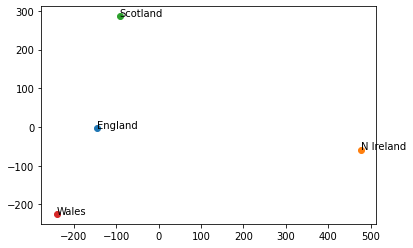

In [37]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

To learn more **PCA and number of components**, read https://setosa.io/ev/principal-component-analysis/

### Answer: Ireland is different from other three countries in UK
Why is Ireland such an outlier?

## How much of the information in the original dataset is preserved in the principle components?
Hint: use [pca.explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [43]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print("X_r=\n", X_r, "\n")
print("explained_variance_=", pca.explained_variance_)
print("explained_variance_ratio_=", pca.explained_variance_ratio_) #outputs [0.67444346 0.29052475]. 
print("explained_variance_ratio_.cumsum()=", pca.explained_variance_ratio_.cumsum())

X_r=
 [[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]] 

explained_variance_= [105073.34576714  45261.62487597]
explained_variance_ratio_= [0.67444346 0.29052475]
explained_variance_ratio_.cumsum()= [0.67444346 0.96496821]


#### Notes
`pca.explained_variance_ratio_` = [0.67444346 0.29052475]

- Meaning the first principle component preserves 67% of the information and the second principle component preserve 29% which totals 96% of the information in X is preserved from two components.

So we always should define our threshold level (for example 95%) then if the `explained_variance_ratio` is below we increase the number of assigned components. With our dataset, with 2 components, 96% of information in X is in X_r (X_reduced)


## How to calculate the correlation of the principle components:

In [52]:
import scipy

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(0.0, 1.0)


### Activity (Reminder): Reverse the elemnts of a list

In [65]:
def reverse_list(list):
    reversed_list = []
    list_length = len(list)
    for i in range(list_length):
        current = list[list_length - (i + 1)]
        reversed_list.append(current)
    return reversed_list

list_to_reverse = [1,2,3,4,5]
print(reverse_list(list_to_reverse))

# OR
print(list_to_reverse[::-1])

[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]


## Lets write our own function to obtain principle components
### Activity: PCA Steps
**In groups of 3**: Follow the steps here and write a function that computes the principle components for a dataset similar to the one we watched on YouTube: https://www.youtube.com/watch?v=0GzMcUy7ZI0

### Steps:
1. Use the following matrix: `X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])` #4 rows with 3 features, should be reduced to 4 rows and 2 columns
2. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
3. Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you...) --> this new matrix will be our covariance matrix.
4. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
5. Sort the eigevalues so that they are in descending order, and then find the top N (for example, 2) eigenvectors
6. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix
7. Compare the result of custom function with PCA in sklearn

#### Mysolution - unfinished and wrong

In [85]:

import numpy as np
from sklearn.decomposition import PCA
import scipy

def calculate_PCA(array, comp_num):
    #2.
    col_mean = array.mean(axis=0) #array of mean of each columns
#     print(col_mean)
    center_matrix = array - col_mean #Subtract the column mean from the feature matrix
#     print(center_matrix)
    #3.
    cov = np.cov(center_matrix)
#     print(cov)
    #4. eigenvalue and eigenvector of the covariance matrix
    eig_value, eig_vector = np.linalg.eig(cov)
    #5. sort in descending order
    eigvalues_reversed = np.sort(eig_value)[::-1]
    print(eigvalues_reversed)
    # find the top eigenvectors
    print("\n", eig_vector)
    
    
    

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
calculate_PCA(X, 2)

[1.32212166e+00 9.45450057e-02 7.89185006e-17 3.99762102e-18]

 [[-0.63281645  0.59122191 -0.03786412  0.37621558]
 [-0.27179185 -0.71376644  0.36921189  0.64511685]
 [ 0.21093882 -0.19707397 -0.85201612 -0.16158696]
 [ 0.69366948  0.3196185   0.36921189  0.64511685]]


### Milad's PCA solution

In [86]:
import numpy as np
from sklearn.decomposition import PCA
import scipy

# PCA computation by sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2) 
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))


# Our function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  data - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] #sort and get reverse (returns an array of index)
    idx_n_comp = idx[:n_comp] # get the index that is top 2
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp] # get the eig_vector that from the top 2 index
    P = np.dot(C, eig_vector)
    return P


PCA_calculation(X, 2) # is what is happening in these 2 lines pca = PCA(n_components=2) AND X_r = pca.fit_transform(X)

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.885780586188048e-16, 0.9999999999999996)
[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[ 1.65392786, -0.2775295 ],
       [ 0.84584087,  0.31153366],
       [-0.55130929,  0.09250983],
       [-1.94845944, -0.126514  ]])

## Question: Is PCA Supervised or Unsupervised?
- Did we use any label to do dimensionality reduction?

## Activity: Apply Principle to Boston housing features and then train the linear regression model
- Basically, we remove correlation among features with PCA
- We do not need to do feature data scaling (normalization) when we do PCA for features, because
- Report the R-squared and MSE for a system with PCA+Linear Regression

## Summary:
- PCA is a **mathematical technique to reduce redundancy in data, and is an algorithm for Dimensionality Reduction
- PCA emphasizes variation and strong patterns, making the data easier to visualize
- We use eigenvectors and eigenvalues to obtain the principle component (our new features) in lower dimension

Resources:
http://setosa.io/ev/principal-component-analysis/